C=1.00
Sparsity with L1 penalty:                6.25%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.10
Sparsity with L1 penalty:                31.25%
Sparsity with Elastic-Net penalty:       12.50%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                84.38%
Sparsity with Elastic-Net penalty:       68.75%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.89


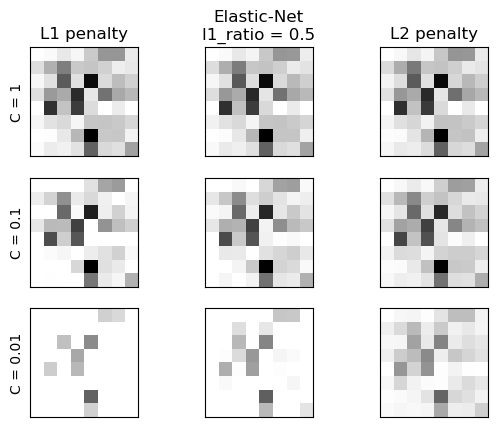

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X, y = datasets.load_digits(return_X_y=True)

X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(int)

l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    # Increase tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, l1_ratio=1, tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, l1_ratio=0, tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(C=C, l1_ratio=l1_ratio, tol=0.01, solver="saga")
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print(f"C={C:.2f}")
    print(f"{'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:.2f}%")
    print(f"{'Sparsity with Elastic-Net penalty:':<40} {sparsity_en_LR:.2f}%")
    print(f"{'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%")
    print(f"{'Score with L1 penalty:':<40} {clf_l1_LR.score(X, y):.2f}")
    print(f"{'Score with Elastic-Net penalty:':<40} {clf_en_LR.score(X, y):.2f}")
    print(f"{'Score with L2 penalty:':<40} {clf_l2_LR.score(X, y):.2f}")

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel(f"C = {C}")

plt.show()

C=0.10
Sparsity with L1 penalty:                29.69%
Sparsity with Elastic-Net penalty:       12.50%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                84.38%
Sparsity with Elastic-Net penalty:       68.75%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.89
C=0.00
Sparsity with L1 penalty:                100.00%
Sparsity with Elastic-Net penalty:       100.00%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.50
Score with Elastic-Net penalty:          0.50
Score with L2 penalty:                   0.87


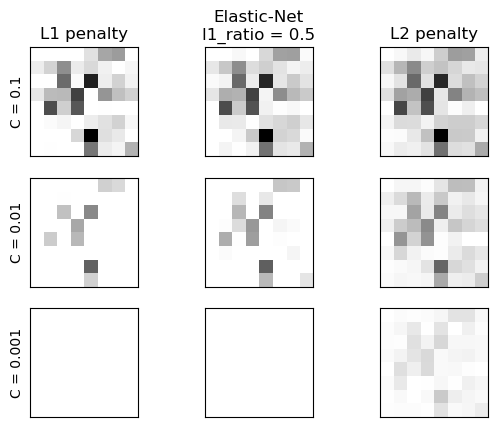

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X, y = datasets.load_digits(return_X_y=True)

X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(int)

l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((0.1, 0.01, 0.001), axes)):
    # Increase tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, l1_ratio=1, tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, l1_ratio=0, tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(C=C, l1_ratio=l1_ratio, tol=0.01, solver="saga")
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print(f"C={C:.2f}")
    print(f"{'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:.2f}%")
    print(f"{'Sparsity with Elastic-Net penalty:':<40} {sparsity_en_LR:.2f}%")
    print(f"{'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%")
    print(f"{'Score with L1 penalty:':<40} {clf_l1_LR.score(X, y):.2f}")
    print(f"{'Score with Elastic-Net penalty:':<40} {clf_en_LR.score(X, y):.2f}")
    print(f"{'Score with L2 penalty:':<40} {clf_l2_LR.score(X, y):.2f}")

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel(f"C = {C}")

plt.show()

C=100.00
Sparsity with L1 penalty:                4.69%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=10.00
Sparsity with L1 penalty:                4.69%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=1.00
Sparsity with L1 penalty:                6.25%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.91
Score with L2 penalty:                   0.90


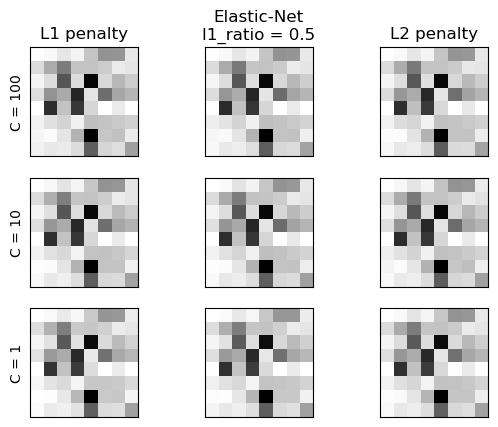

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X, y = datasets.load_digits(return_X_y=True)

X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(int)

l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((100, 10, 1), axes)):
    # Increase tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, l1_ratio=1, tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, l1_ratio=0, tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(C=C, l1_ratio=l1_ratio, tol=0.01, solver="saga")
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print(f"C={C:.2f}")
    print(f"{'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:.2f}%")
    print(f"{'Sparsity with Elastic-Net penalty:':<40} {sparsity_en_LR:.2f}%")
    print(f"{'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%")
    print(f"{'Score with L1 penalty:':<40} {clf_l1_LR.score(X, y):.2f}")
    print(f"{'Score with Elastic-Net penalty:':<40} {clf_en_LR.score(X, y):.2f}")
    print(f"{'Score with L2 penalty:':<40} {clf_l2_LR.score(X, y):.2f}")

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel(f"C = {C}")

plt.show()

## ¿Cómo afecta la dispersión a la precisión del modelo?
Tiene un efecto de equilibrio. Un poco de dispersión ayuda a eliminar el "ruido" y mantiene la precisión alta. Sin embargo, si la dispersión es excesiva, el modelo borra información importante y la precisión cae drásticamente.
## ¿Qué ventajas tiene un modelo disperso en términos de interpretabilidad?
Actúa como un selector automático de características. Al poner en cero las variables inútiles, te deja ver claramente cuáles son las pocas variables importantes que realmente toma en cuenta el modelo para decidir. Es más fácil explicar un modelo que usa 10 datos que uno que usa 100.
## ¿Cómo se compara la regularización L1 con la regularización L2?
L1 : Puede volver los coeficientes exactamente cero, eliminando variables y creando modelos dispersos.
L2 : Solo hace los coeficientes muy pequeños, pero nunca los elimina por completo.
## ¿Qué impacto tiene la dispersión en la capacidad del modelo para generalizar?
Ayuda a evitar el sobreajuste. Al tener un modelo más simple, es menos probable que memorice los datos de entrenamiento, por lo que funcionará mejor cuando reciba datos nuevos y desconocidos.
## ¿Cómo podrías ajustar la fuerza de regularización para mejorar el rendimiento del modelo?
Se debe probar distintos valores de C usando una técnica llamada Validación Cruzada. El objetivo es encontrar el número intermedio exacto donde el modelo sea lo suficientemente simple para generalizar, pero lo suficientemente complejo para no perder precisión.